In [1]:
import pandas as pd
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df_posts = pd.read_csv('./data/all_posts_active_subreddit.csv')

In [7]:
df_com = pd.read_csv('./data/all_comments.csv')
df_com

,Comment ID,Parent ID,Content,Author,Upvotes,Downvotes,Date & Time,Score,Post ID,Permalink
0,kfz0n9j,NaN,Placing a comment so I can find this again later,MarcoYTVA,1.0,0.0,2024-01-02 13:11:49,1.0,18w60ix,NaN
1,kdkrem6,NaN,"""For three decades, policymakers have promised to address the climate crisis. For three decades, global emissions of greenhouse gases have continued to climb, giving rise to the suspicion that the capitalist world system is incapable of reducing CO2 emissions globally.""",tkonicz,1.0,0.0,2023-12-16 05:44:11,1.0,18jkfbc,NaN
2,kdkr8q7,NaN,"Economic ""growth"" is just a result of the acculumation of capital. Lets be clear here: We need to get rid of capitalism. [https://www.konicz.info/2022/01/14/the-climate-crisis-and-the-outer-limits-of-capital/](https://www.konicz.info/2022/01/14/the-climate-crisis-and-the-outer-limits-of-capital/)",tkonicz,1.0,0.0,2023-12-16 05:42:27,1.0,18j3b0a,NaN
3,kdlpakh,kdkr8q7,Of course degrowth is only possible in socialism,Monsteristbeste,1.0,0.0,2023-12-16 12:15:48,1.0,18j3b0a,https://reddit.com/r/FridaysForFuture/comments/18j3b0a/why_we_need_degrowth/kdlpakh/
4,kd0j896,NaN,If the website does not start with **do not buy new shit if you can avoid it** you are doing something wrong.,Sendboobpics_please,5.0,0.0,2023-12-12 08:22:43,5.0,18frxi8,NaN
...,...,...,...,...,...,...,...,...,...,...
337812,jxxfitt,jxw6fjs,Faut ptet laissé le temps aux plantes de pousser ?,tomams40,2.0,0.0,2023-08-27 06:33:46,2.0,161pikv,https://reddit.com/r/ecologie/comments/161pikv/lyon_les_automobilistes_dénoncent_la_création/jxxfitt/
337813,jxzk8jj,jxw6fjs,Au moins dans un parking on peut se caler à l'ombre d'un camion (peint en vert de préférence) pour passer un moment tranquille.,SpellAsleep4572,1.0,0.0,2023-08-27 18:08:38,1.0,161pikv,https://reddit.com/r/ecologie/comments/161pikv/lyon_les_automobilistes_dénoncent_la_création/jxzk8jj/
337814,jy29mz4,jxw6fjs,Le végétal ça doit pousser hein,freeblowjobiffound,1.0,0.0,2023-08-28 07:38:05,1.0,161pikv,https://reddit.com/r/ecologie/comments/161pikv/lyon_les_automobilistes_dénoncent_la_création/jy29mz4/
337815,jxt8t3g,NaN,Après ils vont se plaindrent de la canicule....,NoAwareness8874,2.0,0.0,2023-08-26 10:23:29,2.0,161pikv,NaN


In [27]:
df_posts.groupby(['Subreddit'])['Post ID'].nunique().reset_index(name='posts')

,Subreddit,posts
0,ClimateActionPlan,1613
1,ClimateCO,1024
2,ClimateCrisisCanada,1500
3,ClimateNews,1352
4,ClimateOffensive,1965
5,ClimateShitposting,1145
6,Climate_Nuremberg,104
7,Ecologisme,1295
8,ExtinctionRebellion,1822
9,FridaysForFuture,930


In [28]:
df_posts[['Post ID', 'Subreddit']]

,Post ID,Subreddit
0,1996ooq,FridaysForFuture
1,1903h8r,FridaysForFuture
2,18w60ix,FridaysForFuture
3,18m0zx6,FridaysForFuture
4,18jkfbc,FridaysForFuture
...,...,...
25078,up5gdz,Ecologisme
25079,un9isk,Ecologisme
25080,ukflhr,Ecologisme
25081,uivh0f,Ecologisme


In [8]:
df = df_com.merge(df_posts[['Post ID', 'Subreddit']].drop_duplicates(), on='Post ID', how='left')

# Ensure that 'Parent ID' is not NA to keep only comments that have a parent (either a post or another comment)
df = df.dropna(subset=['Parent ID'])

# Merge the DataFrame with itself to align comments with their replies, including Subreddit information
df_replies = pd.merge(df, df, left_on="Comment ID", right_on="Parent ID", suffixes=('_1', '_2'))

# Filter out rows where Author_1 == Author_2 to get only cases where different authors are interacting
df_replies_filtered = df_replies[df_replies['Author_1'] != df_replies['Author_2']]

# Selecting relevant columns for the output DataFrame, including Subreddit from either side (they should be the same)
df_author_interaction = df_replies_filtered[['Author_1', 'Author_2', 'Post ID_1', 'Date & Time_2', 'Subreddit_1']].drop_duplicates()

# Renaming columns for clarity
df_author_interaction.rename(columns={"Post ID_1": "Post ID", "Date & Time_2": "Date & Time", "Subreddit_1": "Subreddit"}, inplace=True)

# Adding the 'Type' column to indicate these are comments
df_author_interaction['Type'] = 'Comment'

# Display the updated DataFrame
df_author_interaction


,Author_1,Author_2,Post ID,Date & Time,Subreddit,Type
0,energy4a11,jay_jay_abrahams,18eyzms,2023-12-11 08:16:53,FridaysForFuture,Comment
1,energy4a11,Ok-Possibility-9733,18eyzms,2023-12-11 23:15:52,FridaysForFuture,Comment
2,whiteandyellowcat,Dave37,183vkb5,2023-11-26 23:31:48,FridaysForFuture,Comment
3,Dave37,whiteandyellowcat,183vkb5,2023-11-26 23:42:45,FridaysForFuture,Comment
4,Dave37,squidguy_mc,17xso8b,2023-11-19 11:59:01,FridaysForFuture,Comment
...,...,...,...,...,...,...
155850,GenericOfficeMan,_JohnJacob,tf0tj6,2022-03-18 00:27:01,ClimateCrisisCanada,Comment
155851,_JohnJacob,GenericOfficeMan,tf0tj6,2022-03-18 06:04:49,ClimateCrisisCanada,Comment
155852,GenericOfficeMan,_JohnJacob,tf0tj6,2022-03-18 20:13:00,ClimateCrisisCanada,Comment
155853,_JohnJacob,GenericOfficeMan,tf0tj6,2022-03-18 21:12:11,ClimateCrisisCanada,Comment


In [30]:
df_author_interaction.groupby(['Post ID']).size().reset_index(name='nb comments').sort_values(by='nb comments',ascending=False).head(10)

,Post ID,nb comments
5569,dyzk6v,168
2247,16y3kma,161
3040,1831vlb,160
3141,1876u8n,151
8993,yxs8rp,149
3004,181i90d,146
2898,17xmqqe,143
602,12s67hk,141
6351,gh85h7,141
1663,163bz0a,140


In [31]:
df_author_interaction[['Author_1','Author_2','Post ID']].duplicated(keep=False).sum()


72859

In [32]:
df_posts.head(1)

,Unnamed: 0,Post ID,Title,Type,Content,Author,Upvotes,Downvotes,Upvote Ratio,Comments,Date & Time,External Link,category,Subreddit
0,0,1996ooq,What is 'new denial?' An alarming wave of clim...,URL,https://www.cnn.com/2024/01/16/climate/climate...,Alexius08,4.0,0.0,0.84,0.0,2024-01-17 20:23:39,https://www.cnn.com/2024/01/16/climate/climate...,hot,FridaysForFuture


In [9]:
df_direct_comments = df_com[df_com["Parent ID"].isnull()]

df_author_post_comment = pd.merge(df_direct_comments, df_posts, left_on="Post ID", right_on="Post ID", suffixes=('_comment', '_post'))

# Selecting relevant columns for the output DataFrame: Author_post, Author_comment, Post ID, and Date & Time of the post
df_author_interaction_posts = df_author_post_comment[['Author_post', 'Author_comment', 'Post ID', 'Date & Time_post','Subreddit']].drop_duplicates()

# Renaming columns for clarity
df_author_interaction_posts.rename(columns={
    "Author_post": "Author_1", 
    "Author_comment": "Author_2", 
    "Date & Time_post": "Date & Time"
}, inplace=True)

# Adding the 'Type' column to indicate these are posts
df_author_interaction_posts['Type'] = 'Post'

# Display the updated DataFrame
df_author_interaction_posts

,Author_1,Author_2,Post ID,Date & Time,Subreddit,Type
0,Polyhedral_Media,MarcoYTVA,18w60ix,2024-01-01 20:36:33,FridaysForFuture,Post
1,tkonicz,tkonicz,18jkfbc,2023-12-16 05:43:59,FridaysForFuture,Post
2,Monsteristbeste,tkonicz,18j3b0a,2023-12-15 15:58:11,FridaysForFuture,Post
3,AccomplishedHotel383,Sendboobpics_please,18frxi8,2023-12-11 10:54:23,FridaysForFuture,Post
4,AccomplishedHotel383,new_skool_hepcat,18frxi8,2023-12-11 10:54:23,FridaysForFuture,Post
...,...,...,...,...,...,...
108951,idspispopd,_JohnJacob,tf0tj6,2022-03-15 21:27:08,ClimateCrisisCanada,Post
108952,AAASA-Concentrate98X,rodinsbusiness,161pikv,2023-08-26 08:33:08,ecologie,Post
108953,AAASA-Concentrate98X,Frog-4724,161pikv,2023-08-26 08:33:08,ecologie,Post
108954,AAASA-Concentrate98X,NoAwareness8874,161pikv,2023-08-26 08:33:08,ecologie,Post


In [10]:
""" Date & Time is the date of the post if Type = Post and it's the date of the comment if the type = comment"""


df_all = pd.concat([df_author_interaction_posts,df_author_interaction])
df_all

,Author_1,Author_2,Post ID,Date & Time,Subreddit,Type
0,Polyhedral_Media,MarcoYTVA,18w60ix,2024-01-01 20:36:33,FridaysForFuture,Post
1,tkonicz,tkonicz,18jkfbc,2023-12-16 05:43:59,FridaysForFuture,Post
2,Monsteristbeste,tkonicz,18j3b0a,2023-12-15 15:58:11,FridaysForFuture,Post
3,AccomplishedHotel383,Sendboobpics_please,18frxi8,2023-12-11 10:54:23,FridaysForFuture,Post
4,AccomplishedHotel383,new_skool_hepcat,18frxi8,2023-12-11 10:54:23,FridaysForFuture,Post
...,...,...,...,...,...,...
155850,GenericOfficeMan,_JohnJacob,tf0tj6,2022-03-18 00:27:01,ClimateCrisisCanada,Comment
155851,_JohnJacob,GenericOfficeMan,tf0tj6,2022-03-18 06:04:49,ClimateCrisisCanada,Comment
155852,GenericOfficeMan,_JohnJacob,tf0tj6,2022-03-18 20:13:00,ClimateCrisisCanada,Comment
155853,_JohnJacob,GenericOfficeMan,tf0tj6,2022-03-18 21:12:11,ClimateCrisisCanada,Comment


In [11]:
df_all['Sorted Author Pair'] = df_all.apply(lambda x: tuple(sorted([x['Author_1'], x['Author_2']])), axis=1)

# Group by the normalized author pairs
grouped = df_all.groupby('Sorted Author Pair')

# Count total interactions
df_interactions = grouped.size().reset_index(name='Number of Interactions')

# Count interactions by type
interaction_types = grouped['Type'].value_counts().unstack().fillna(0).reset_index()

# Merge the counts back to the main DataFrame
df_interactions = pd.merge(df_interactions, interaction_types, how='left', on='Sorted Author Pair')

# Rename columns and drop the sorted pair column for clarity
df_interactions.rename(columns={
    'Comment': 'Number of Comments Interactions',
    'Post': 'Number of Posts Interactions',
    'Sorted Author Pair': 'Author Pair'
}, inplace=True)

# Split 'Author Pair' back into two columns, if needed
df_interactions[['Author_1', 'Author_2']] = pd.DataFrame(df_interactions['Author Pair'].tolist(), index=df_interactions.index)
df_interactions.drop(columns=['Author Pair'], inplace=True)

# Rearrange columns order
df_interactions = df_interactions[['Author_1', 'Author_2', 'Number of Interactions', 'Number of Comments Interactions', 'Number of Posts Interactions']]

df_interactions = df_interactions.sort_values(by='Number of Interactions',ascending=False)

df_interactions

,Author_1,Author_2,Number of Interactions,Number of Comments Interactions,Number of Posts Interactions
114306,[deleted],[deleted],785,0.0,785.0
81131,NewyBluey,[deleted],523,507.0,16.0
57110,ILikeNeurons,[deleted],510,399.0,111.0
117022,[deleted],logicalprogressive,444,377.0,67.0
68045,LackmustestTester,[deleted],392,266.0,126.0
...,...,...,...,...,...
53528,HarkansawJack,Toadfinger,1,0.0,1.0
53522,Harigot_56,noopshuffycaps,1,1.0,0.0
53521,Harigot_56,kornx,1,0.0,1.0
53520,Harigot_56,dorshiffe_2,1,1.0,0.0


In [12]:
# Remove Deleted accounts
df_interactions = df_interactions[df_interactions['Author_1'] != '[deleted]']
df_interactions = df_interactions[df_interactions['Author_2'] != '[deleted]']
df_interactions

,Author_1,Author_2,Number of Interactions,Number of Comments Interactions,Number of Posts Interactions
67579,LackmustestTester,Left_Insanity,316,282.0,34.0
67573,LackmustestTester,LackmustestTester,215,0.0,215.0
135829,livinginahologram,livinginahologram,210,0.0,210.0
55287,Honest_Cynic,Infamous_Employer_85,194,190.0,4.0
56781,ILikeNeurons,ILikeNeurons,192,0.0,192.0
...,...,...,...,...,...
53528,HarkansawJack,Toadfinger,1,0.0,1.0
53522,Harigot_56,noopshuffycaps,1,1.0,0.0
53521,Harigot_56,kornx,1,0.0,1.0
53520,Harigot_56,dorshiffe_2,1,1.0,0.0


In [13]:
def find_most_interactive(df, subreddit, mode='individual'):
    """
    Finds the most interactive users or user pair in a given subreddit, with detailed statistics.
    
    Parameters:
        df (pd.DataFrame): The dataset containing Reddit interactions.
        subreddit (str): The subreddit to analyze.
        mode (str): 'individual' for individual user stats, 'pair' for user pair stats.
        
    Returns:
        pd.DataFrame: DataFrame with interaction statistics, sorted by the number of interactions.
    """
    # Filter the dataset for the specific subreddit
    df_filtered = df[df['Subreddit'] == subreddit]
    
    if mode == 'individual':
        # Aggregate interactions by individual
        interactions = df_filtered['Author_1'].value_counts() + df_filtered['Author_2'].value_counts().fillna(0)
        posts = df_filtered[df_filtered['Type'] == 'Post']['Author_1'].value_counts()
        comments = df_filtered[df_filtered['Type'] == 'Comment']['Author_1'].value_counts()
        
        # Create a DataFrame
        df_stats = pd.DataFrame({
            'Author': interactions.index,
            'Nb Interactions': interactions.values,
            'Nb of Posts': posts.reindex(interactions.index).fillna(0).values,
            'Nb of Comments': comments.reindex(interactions.index).fillna(0).values
        })
        
    elif mode == 'pair':
        # Count interactions per pair
        pairs = df_filtered.groupby(['Author_1', 'Author_2']).size().reset_index(name='Nb Interactions')
        pairs['Couple Authors'] = pairs.apply(lambda x: f"{x['Author_1']} & {x['Author_2']}", axis=1)
        df_stats = pairs[['Couple Authors', 'Nb Interactions']]
        
    else:
        raise ValueError("Mode must be 'individual' or 'pair'")
    
    # Sort DataFrame by the number of interactions
    df_stats = df_stats.sort_values(by='Nb Interactions', ascending=False).reset_index(drop=True)
    
    return df_stats

In [14]:
df_all = df_all[df_all['Author_1'] != '[deleted]']
df_all = df_all[df_all['Author_2'] != '[deleted]']

In [15]:
find_most_interactive(df_all, "climateskeptics", mode='individual')

,Author,Nb Interactions,Nb of Posts,Nb of Comments
0,LackmustestTester,4174.0,1795.0,1038.0
1,logicalprogressive,3928.0,1273.0,1150.0
2,Left_Insanity,3811.0,2139.0,775.0
3,suspended_007,3544.0,3360.0,118.0
4,NewyBluey,1937.0,5.0,805.0
...,...,...,...,...
9128,zihuatapulco,NaN,0.0,0.0
9129,zingo-spleen,NaN,0.0,0.0
9130,zizop,NaN,0.0,0.0
9131,zsoltjuhos,NaN,0.0,0.0


In [40]:
find_most_interactive(df_all, "climateskeptics", mode='pair').head(15)

,Couple Authors,Nb Interactions
0,LackmustestTester & LackmustestTester,200
1,LackmustestTester & Left_Insanity,175
2,Left_Insanity & Left_Insanity,145
3,Left_Insanity & LackmustestTester,141
4,logicalprogressive & logicalprogressive,99
5,logicalprogressive & LackmustestTester,98
6,LackmustestTester & logicalprogressive,62
7,jweezy2045 & NewyBluey,44
8,jweezy2045 & redditmod_soyboy,43
9,LackmustestTester & zeusismycopilot,41


/var/folders/sy/c1_rq0_x6dgdg_c_vymm1lnw0000gn/T/ipykernel_92292/1005095871.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date & Time'] = pd.to_datetime(df_filtered['Date & Time'])


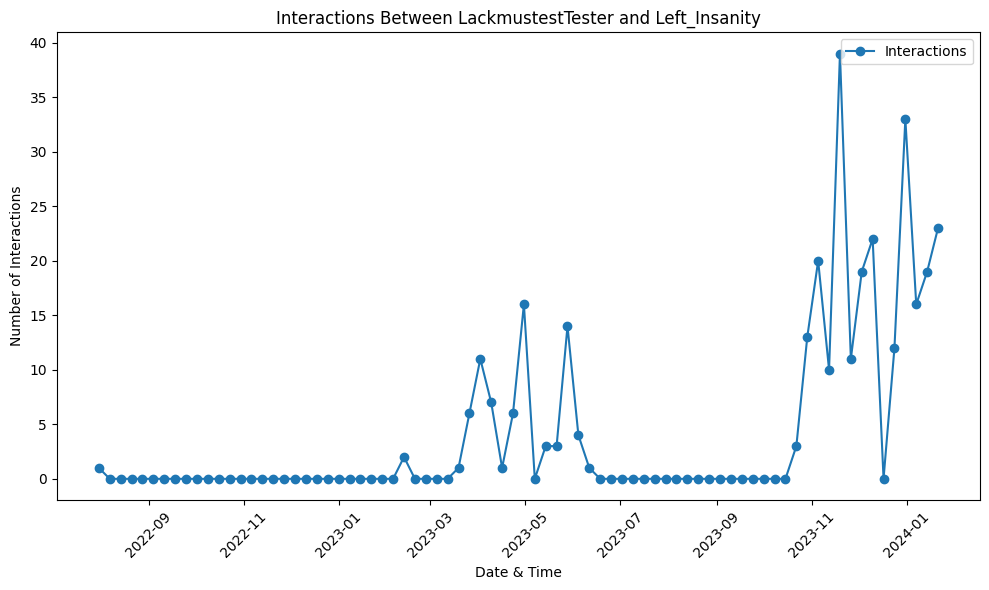

In [41]:
def plot_interactions(author1, author2, df, aggregation='none'):
    """
    Plots interactions over time between two specified authors.
    
    Parameters:
    - author1: The name of the first author.
    - author2: The name of the second author.
    - df: DataFrame containing the interactions data.
    - aggregation: The time frequency for aggregating data ('daily', 'weekly', 'monthly', 'none').
    """
    # Filter for interactions involving both authors, regardless of order
    df_filtered = df[((df['Author_1'] == author1) & (df['Author_2'] == author2)) |
                     ((df['Author_1'] == author2) & (df['Author_2'] == author1))]
    
    # Convert 'Date & Time' to datetime if not already
    df_filtered['Date & Time'] = pd.to_datetime(df_filtered['Date & Time'])
    
    # Set 'Date & Time' as the index
    df_filtered = df_filtered.set_index('Date & Time')
    
    # Aggregation
    if aggregation != 'none':
        # Define the resampling rule
        if aggregation == 'daily':
            rule = 'D'
        elif aggregation == 'weekly':
            rule = 'W'
        elif aggregation == 'monthly':
            rule = 'M'
        else:
            raise ValueError("Invalid aggregation value. Choose 'daily', 'weekly', 'monthly', or 'none'.")
        
        # Resample and count occurrences
        df_filtered = df_filtered.resample(rule).size().reset_index(name='Count')
    else:
        # If no aggregation, simply reset the index to get 'Date & Time' back as a column
        df_filtered.reset_index(inplace=True)
        df_filtered['Count'] = 1  # Add a count column for consistent plotting
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    if aggregation == 'none':
        # Plot each interaction as a point
        plt.scatter(df_filtered['Date & Time'], df_filtered['Count'], label='Interactions', alpha=0.7)
        plt.ylabel('Interactions')
    else:
        # Plot the aggregated data
        plt.plot(df_filtered['Date & Time'], df_filtered['Count'], marker='o', linestyle='-', label='Interactions')
        plt.ylabel('Number of Interactions')
    
    plt.title(f'Interactions Between {author1} and {author2}')
    plt.xlabel('Date & Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_interactions("LackmustestTester","Left_Insanity",df=df_all, aggregation='weekly')

/var/folders/sy/c1_rq0_x6dgdg_c_vymm1lnw0000gn/T/ipykernel_92292/1005095871.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date & Time'] = pd.to_datetime(df_filtered['Date & Time'])


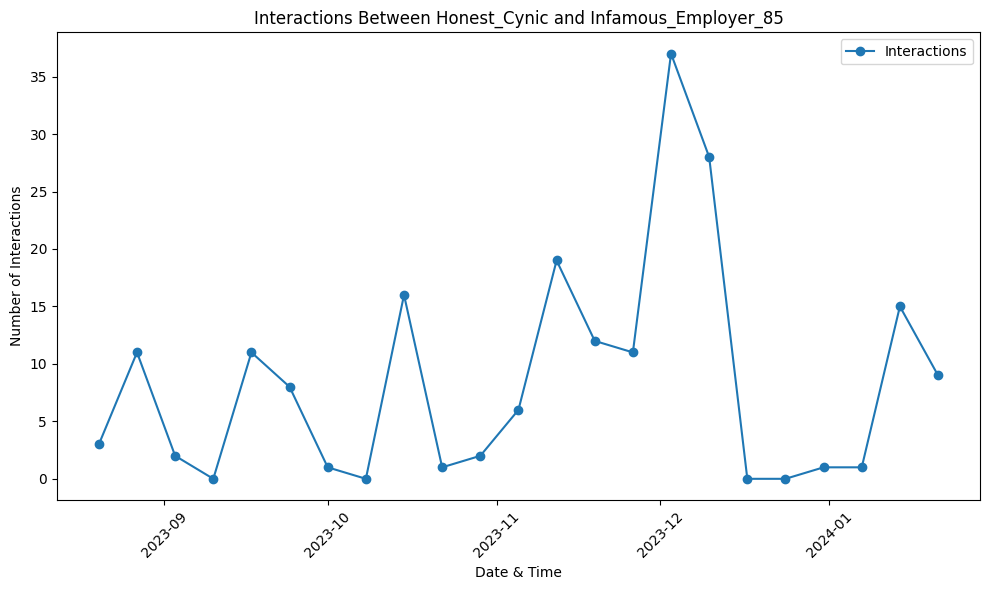

In [42]:
plot_interactions("Honest_Cynic","Infamous_Employer_85",df=df_all, aggregation='weekly')

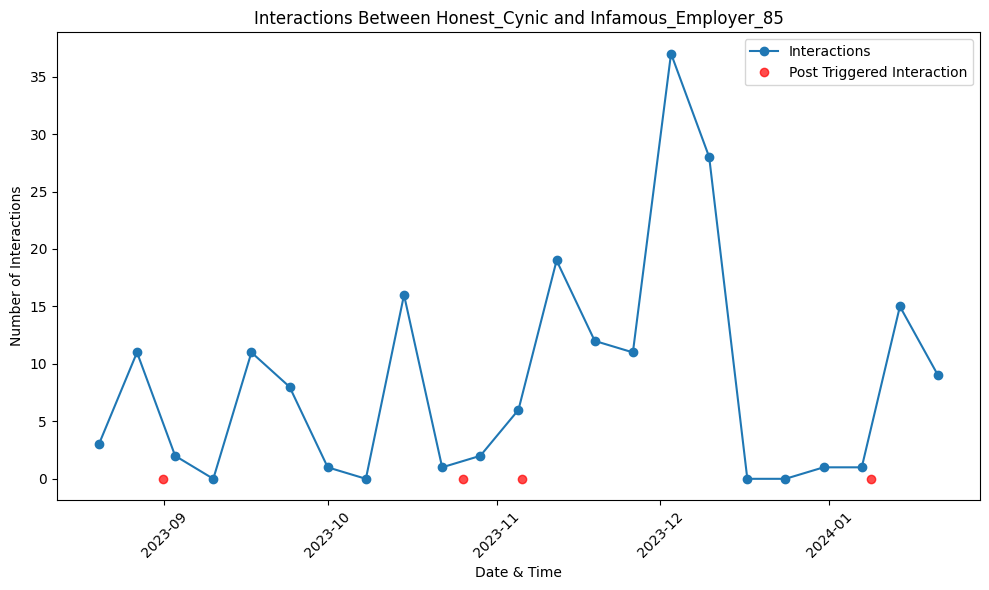

In [52]:
def plot_interactions_with_posts(author1, author2, df, aggregation='none'):
    """
    Plots interactions over time between two specified authors, with markers for specific posts that led to interactions.
    
    Parameters:
    - author1: The name of the first author.
    - author2: The name of the second author.
    - df: DataFrame containing the interactions data.
    - aggregation: The time frequency for aggregating data ('daily', 'weekly', 'monthly', 'none').
    """
    # Ensure 'Date & Time' is datetime
    df['Date & Time'] = pd.to_datetime(df['Date & Time'])
    
    # Filter interactions and posts
    interactions = df[((df['Author_1'] == author1) & (df['Author_2'] == author2)) | 
                      ((df['Author_1'] == author2) & (df['Author_2'] == author1))]
    
    # Filter only posts that led to interactions
    posts = interactions[interactions['Type'] == 'Post']
    
    # Set 'Date & Time' as the index for aggregation purposes
    interactions = interactions.set_index('Date & Time')

    # Aggregate if necessary
    if aggregation != 'none':
        rule = {'daily': 'D', 'weekly': 'W', 'monthly': 'M'}.get(aggregation)
        if not rule:
            raise ValueError("Invalid aggregation value. Choose 'daily', 'weekly', 'monthly', or 'none'.")
        
        interactions_count = interactions.resample(rule).size().reset_index(name='Count')
    else:
        interactions_count = interactions.reset_index()
        interactions_count['Count'] = 1  

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot interactions
    if aggregation != 'none':
        plt.plot(interactions_count['Date & Time'], interactions_count['Count'], marker='o', linestyle='-', label='Interactions')
    else:
        plt.scatter(interactions_count['Date & Time'], interactions_count['Count'], label='Interactions', alpha=0.7)

    # Highlight posts that led to interactions
    for _, row in posts.iterrows():
        plt.plot(row['Date & Time'], 0, 'ro', label='Post Triggered Interaction' if _ == posts.index[0] else "", alpha=0.7)  
    
    plt.title(f'Interactions Between {author1} and {author2}')
    plt.xlabel('Date & Time')
    plt.ylabel('Number of Interactions' if aggregation != 'none' else 'Interactions')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_interactions_with_posts("Honest_Cynic","Infamous_Employer_85",df=df_all, aggregation='weekly')
# plot_interactions_with_posts("LackmustestTester", "Left_Insanity", df=df_all, aggregation='weekly')

In [53]:
df_all

,Author_1,Author_2,Post ID,Date & Time,Subreddit,Type,Sorted Author Pair
0,Polyhedral_Media,MarcoYTVA,18w60ix,2024-01-01 20:36:33,FridaysForFuture,Post,"(MarcoYTVA, Polyhedral_Media)"
1,tkonicz,tkonicz,18jkfbc,2023-12-16 05:43:59,FridaysForFuture,Post,"(tkonicz, tkonicz)"
2,Monsteristbeste,tkonicz,18j3b0a,2023-12-15 15:58:11,FridaysForFuture,Post,"(Monsteristbeste, tkonicz)"
3,AccomplishedHotel383,Sendboobpics_please,18frxi8,2023-12-11 10:54:23,FridaysForFuture,Post,"(AccomplishedHotel383, Sendboobpics_please)"
4,AccomplishedHotel383,new_skool_hepcat,18frxi8,2023-12-11 10:54:23,FridaysForFuture,Post,"(AccomplishedHotel383, new_skool_hepcat)"
...,...,...,...,...,...,...,...
155850,GenericOfficeMan,_JohnJacob,tf0tj6,2022-03-18 00:27:01,ClimateCrisisCanada,Comment,"(GenericOfficeMan, _JohnJacob)"
155851,_JohnJacob,GenericOfficeMan,tf0tj6,2022-03-18 06:04:49,ClimateCrisisCanada,Comment,"(GenericOfficeMan, _JohnJacob)"
155852,GenericOfficeMan,_JohnJacob,tf0tj6,2022-03-18 20:13:00,ClimateCrisisCanada,Comment,"(GenericOfficeMan, _JohnJacob)"
155853,_JohnJacob,GenericOfficeMan,tf0tj6,2022-03-18 21:12:11,ClimateCrisisCanada,Comment,"(GenericOfficeMan, _JohnJacob)"


### Top contributions

In [16]:
def aggregate_interactions(df):

    # Count posts for each Author_1 in each Subreddit
    df1 = df[df['Type'] == 'Post'].drop_duplicates(subset=['Author_1','Post ID'])
    posts = df1.groupby(['Author_1', 'Subreddit']).size().reset_index(name='Posts').rename(columns={'Author_1': 'Author'})

    comments = df[df['Type'] == 'Comment'].groupby(['Author_2', 'Subreddit']).size().reset_index(name='Comments').rename(columns={'Author_2': 'Author'})

    # Merge posts and comments dataframes on Author and Subreddit
    merged = pd.merge(posts, comments, on=['Author', 'Subreddit'], how='outer').fillna(0)

    # Calculate total interactions as the sum of Posts and Comments
    merged['Total'] = merged['Posts'] + merged['Comments']


    return merged


def top_contributors(aggregated_df):
    # Group by Subreddit and sort within each group by Total interactions descending
    top_contributors = aggregated_df.sort_values(['Subreddit', 'Total'], ascending=[True, False]).groupby('Subreddit').head(10)
    return top_contributors

In [17]:
aggregated_df = aggregate_interactions(df_all)

# Get top 10 contributors for each subreddit
top_contributors_df = top_contributors(aggregated_df)

top_contributors_df


,Author,Subreddit,Posts,Comments,Total
2546,WaywardPatriot,ClimateActionPlan,37.0,294.0,331.0
3287,exprtcar,ClimateActionPlan,135.0,94.0,229.0
29334,upvotesthenrages,ClimateActionPlan,0.0,124.0,124.0
3661,kepler456,ClimateActionPlan,6.0,106.0,112.0
235,AutoModerator,ClimateActionPlan,107.0,0.0,107.0
...,...,...,...,...,...
506,Claire12335,greenpeace,1.0,0.0,1.0
638,Decent-Storage-4911,greenpeace,1.0,0.0,1.0
684,Disdreamed,greenpeace,1.0,0.0,1.0
1122,Hour-Log3499,greenpeace,1.0,0.0,1.0


In [18]:
s = top_contributors_df['Author'].value_counts()
s[s>1]

Author
ILikeNeurons         3
LackmustestTester    3
Better_Crazy_8669    2
fungussa             2
silence7             2
ttystikk             2
idspispopd           2
burtzev              2
NewyBluey            2
Tpaine63             2
MayonaiseRemover     2
Chibraltar_          2
upvotesthenrages     2
Name: count, dtype: int64

In [19]:
top_contributors_df[(top_contributors_df['Author']=="ILikeNeurons") | (top_contributors_df['Author']=="LackmustestTester")]

,Author,Subreddit,Posts,Comments,Total
1136,ILikeNeurons,ClimateActionPlan,16.0,85.0,101.0
1137,ILikeNeurons,ClimateOffensive,217.0,698.0,915.0
1369,LackmustestTester,FridaysForFuture,2.0,11.0,13.0
1370,LackmustestTester,climatechange,27.0,375.0,402.0
1138,ILikeNeurons,climatejustice,9.0,2.0,11.0
1371,LackmustestTester,climateskeptics,272.0,986.0,1258.0


These people are in TOP 10 active users in different subreddits.

## Construction de graphes

In [58]:
from datetime import datetime

In [22]:
def add_ISOYearWeek(df):
    # Convert 'Date & Time' to datetime format for easier manipulation
    df['Date & Time'] = pd.to_datetime(df['Date & Time'])

    # Segment data by week
    df['ISOYearWeek'] = df['Date & Time'].apply(lambda x: x.isocalendar()[0] * 100 + x.isocalendar()[1]).astype(str)
    return df

In [23]:
df = df_all.copy()

In [24]:
df = add_ISOYearWeek(df)
subreddit_name = "ClimateActionPlan"
subreddit_df = df[df['Subreddit'] == subreddit_name]

In [62]:
## Add publication date
df_temp = df_posts[['Post ID','Date & Time']].rename(columns={'Date & Time': "Date of Post"})
df = df.merge(df_temp,on="Post ID", how="left")
df

,Author_1,Author_2,Post ID,Date & Time,Subreddit,Type,Sorted Author Pair,ISOYearWeek,Date of Post
0,Polyhedral_Media,MarcoYTVA,18w60ix,2024-01-01 20:36:33,FridaysForFuture,Post,"(MarcoYTVA, Polyhedral_Media)",202401,2024-01-01 20:36:33
1,tkonicz,tkonicz,18jkfbc,2023-12-16 05:43:59,FridaysForFuture,Post,"(tkonicz, tkonicz)",202350,2023-12-16 05:43:59
2,Monsteristbeste,tkonicz,18j3b0a,2023-12-15 15:58:11,FridaysForFuture,Post,"(Monsteristbeste, tkonicz)",202350,2023-12-15 15:58:11
3,AccomplishedHotel383,Sendboobpics_please,18frxi8,2023-12-11 10:54:23,FridaysForFuture,Post,"(AccomplishedHotel383, Sendboobpics_please)",202350,2023-12-11 10:54:23
4,AccomplishedHotel383,new_skool_hepcat,18frxi8,2023-12-11 10:54:23,FridaysForFuture,Post,"(AccomplishedHotel383, new_skool_hepcat)",202350,2023-12-11 10:54:23
...,...,...,...,...,...,...,...,...,...
213577,GenericOfficeMan,_JohnJacob,tf0tj6,2022-03-18 00:27:01,ClimateCrisisCanada,Comment,"(GenericOfficeMan, _JohnJacob)",202211,2022-03-15 21:27:08
213578,_JohnJacob,GenericOfficeMan,tf0tj6,2022-03-18 06:04:49,ClimateCrisisCanada,Comment,"(GenericOfficeMan, _JohnJacob)",202211,2022-03-15 21:27:08
213579,GenericOfficeMan,_JohnJacob,tf0tj6,2022-03-18 20:13:00,ClimateCrisisCanada,Comment,"(GenericOfficeMan, _JohnJacob)",202211,2022-03-15 21:27:08
213580,_JohnJacob,GenericOfficeMan,tf0tj6,2022-03-18 21:12:11,ClimateCrisisCanada,Comment,"(GenericOfficeMan, _JohnJacob)",202211,2022-03-15 21:27:08


In [63]:
df['Date of Post'] = pd.to_datetime(df['Date of Post'])
df.dtypes

Author_1                      object
Author_2                      object
Post ID                       object
Date & Time           datetime64[ns]
Subreddit                     object
Type                          object
Sorted Author Pair            object
ISOYearWeek                   object
Date of Post          datetime64[ns]
dtype: object

In [64]:
# def create_interaction_graph(data):
#     G = nx.Graph()  # Use nx.DiGraph() for a directed graph if needed
#     for _, row in data.iterrows():
#         G.add_edge(row['Author_1'], row['Author_2'])
#     return G

##### Adding weights and make it a directed graph
def create_interaction_graph(data):
    G = nx.DiGraph()  # Create a directed graph
    # Iterate over each row in the DataFrame
    for _, row in data.iterrows():
        author_1 = row['Author_1']
        author_2 = row['Author_2']
        interaction_type = row['Type']  # Assume 'Type' column contains 'Post' or 'Comment'
        
        # Check if the edge already exists
        if G.has_edge(author_1, author_2):
            # If the edge exists, increment its weight
            G[author_1][author_2]['weight'] += 1
            # Optionally, update interaction type if needed
            # This is a simplistic approach; in reality, you might want to handle multiple interactions differently
            G[author_1][author_2]['type'] = interaction_type
        else:
            # If the edge doesn't exist, add it with weight 1 and the interaction type
            G.add_edge(author_2, author_1, weight=1, type=interaction_type)
    return G

# Create a graph for each 'YearWeek'
weekly_graphs = {}
for year_week in subreddit_df['ISOYearWeek'].unique():
    week_data = subreddit_df[subreddit_df['ISOYearWeek'] == year_week]
    weekly_graphs[year_week] = create_interaction_graph(week_data)


In [28]:
subreddit_df

,Author_1,Author_2,Post ID,Date & Time,Subreddit,Type,Sorted Author Pair,ISOYearWeek
48793,ILikeNeurons,Caitliente,11kyeq6,2023-03-07 12:45:06,ClimateActionPlan,Post,"(Caitliente, ILikeNeurons)",202310
48794,ILikeNeurons,tidelwavez,11kyeq6,2023-03-07 12:45:06,ClimateActionPlan,Post,"(ILikeNeurons, tidelwavez)",202310
48795,ILikeNeurons,teratogenic17,11kyeq6,2023-03-07 12:45:06,ClimateActionPlan,Post,"(ILikeNeurons, teratogenic17)",202310
48796,ILikeNeurons,showerZHfood,11kyeq6,2023-03-07 12:45:06,ClimateActionPlan,Post,"(ILikeNeurons, showerZHfood)",202310
48797,ajp022,Slipguard,11kgw7o,2023-03-06 22:51:01,ClimateActionPlan,Post,"(Slipguard, ajp022)",202310
...,...,...,...,...,...,...,...,...
155755,Godspiral,Mason-Shadow,ll2v0z,2021-02-17 04:25:40,ClimateActionPlan,Comment,"(Godspiral, Mason-Shadow)",202107
155756,Mason-Shadow,Godspiral,ll2v0z,2021-02-17 12:53:10,ClimateActionPlan,Comment,"(Godspiral, Mason-Shadow)",202107
155757,Godspiral,Mason-Shadow,ll2v0z,2021-02-17 12:57:47,ClimateActionPlan,Comment,"(Godspiral, Mason-Shadow)",202107
155758,Mason-Shadow,Godspiral,ll2v0z,2021-02-17 13:46:00,ClimateActionPlan,Comment,"(Godspiral, Mason-Shadow)",202107


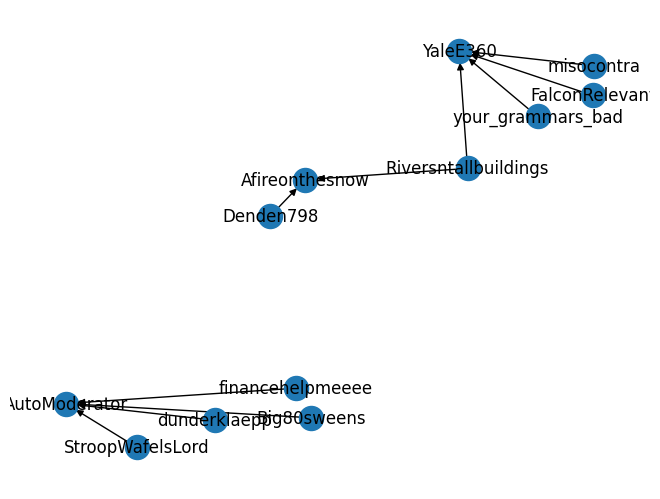

In [72]:
graph = weekly_graphs['202323']

nx.draw(graph, with_labels = True)
plt.show()

Feel free to use dynamics (sequence of graphs) or not, to combine graph-based KPIs with others, or not. Be innovative!

### Using Bert

In [21]:
import torch
from tqdm import tqdm
from transformers import pipeline

# Utiliser tqdm sans définir la couleur de la barre
tqdm.pandas()

# Initialiser le pipeline avec le modèle de détection de toxicité
classifier_toxicity = pipeline("text-classification", model="unitary/toxic-bert")

# Vérifiez si un GPU est disponible et utilisez-le
device = 0 if torch.cuda.is_available() else -1
classifier_toxicity = pipeline("text-classification", model="unitary/toxic-bert", device=device)

df_com['Content'] = df_com['Content'].astype(str).fillna('')

def truncate_text(text, max_length=512):
    if isinstance(text, str):
        # Tokenize the text and truncate it
        tokens = classifier_toxicity.tokenizer.encode(text, max_length=max_length, truncation=True)
        return classifier_toxicity.tokenizer.decode(tokens, skip_special_tokens=True)
    return text

# Appliquer la troncature à chaque commentaire
df_com['Content'] = df_com['Content'].progress_apply(truncate_text)

# Appliquer le modèle sur chaque commentaire tronqué
results = classifier_toxicity(df_com['Content'].tolist())

# Ajouter les résultats au DataFrame
df_com['label'] = [result['label'] for result in results]
df_com['score'] = [result['score'] for result in results]

# Sauvegarder les résultats dans un nouveau fichier CSV
output_file_path = 'all_comments_with_labels.csv'
df_com.to_csv(output_file_path, index=False)

/Users/jordan/miniconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 2848.78it/s]


### Data analysis

In [39]:
df_posts = pd.read_csv('./data/all_posts_active_subreddit.csv')

In [40]:
df_posts.describe()

,Unnamed: 0,Upvotes,Downvotes,Upvote Ratio,Comments
count,25083.000000,25083.000000,25083.0,25083.000000,25083.000000
mean,487.025117,102.624646,0.0,0.919992,16.084719
std,285.786687,198.160838,0.0,0.114387,50.407634
min,0.000000,0.000000,0.0,0.080000,0.000000
25%,238.000000,6.000000,0.0,0.890000,0.000000
50%,486.000000,24.000000,0.0,0.960000,2.000000
75%,730.000000,105.000000,0.0,1.000000,13.000000
max,999.000000,4406.000000,0.0,1.000000,2024.000000


In [41]:
# Group by subreddit and count posts
top_subreddits = df_posts.groupby('Subreddit')['Post ID'].count().sort_values(ascending=False)
print(top_subreddits.head(10))

Subreddit
climateskeptics        2284
climatechange          2070
ClimateOffensive       1965
ecologie               1905
ExtinctionRebellion    1822
ClimateActionPlan      1613
Green                  1602
ClimateCrisisCanada    1500
climatepolicy          1442
ClimateNews            1352
Name: Post ID, dtype: int64


In [42]:
df_com = pd.read_csv('./data/all_comments.csv')

In [44]:
df_com.describe()

,Upvotes,Downvotes,Score
count,337817.000000,337817.0,337817.000000
mean,4.561251,0.0,4.561251
std,12.151157,0.0,12.151157
min,-188.000000,0.0,-188.000000
25%,1.000000,0.0,1.000000
50%,2.000000,0.0,2.000000
75%,5.000000,0.0,5.000000
max,711.000000,0.0,711.000000


In [47]:
df_sub = pd.read_csv('./data/climate_subreddits.csv')

In [48]:
df_active_sub =  pd.read_csv('./data/active_subreddits.csv')


In [49]:
df_sub.describe()

,Subscribers,Creation Year
count,64.000000,64.00000
mean,7555.812500,2016.50000
std,19431.789141,3.91578
min,1.000000,2008.00000
25%,158.750000,2015.00000
50%,561.500000,2017.00000
75%,1847.000000,2019.25000
max,88594.000000,2023.00000


In [50]:
df_active_sub.describe()

,Subscribers,Creation Year
count,24.000000,24.000000
mean,18730.000000,2015.791667
std,28440.116989,4.138674
min,800.000000,2008.000000
25%,1693.750000,2014.750000
50%,2443.000000,2015.500000
75%,29081.000000,2018.250000
max,88594.000000,2022.000000


#

In [68]:
import pandas as pd

# Assuming your datasets are loaded as df_posts and df_comments
df_posts['hour'] = df_posts['Date & Time'].dt.hour
df_com['hour'] = df_com['Date & Time'].dt.hour  # Adjust column name if necessary
# Group by hour and count the number of posts and comments
hourly_posts = df_posts.groupby('hour').size()
hourly_comments = df_com.groupby('hour').size()

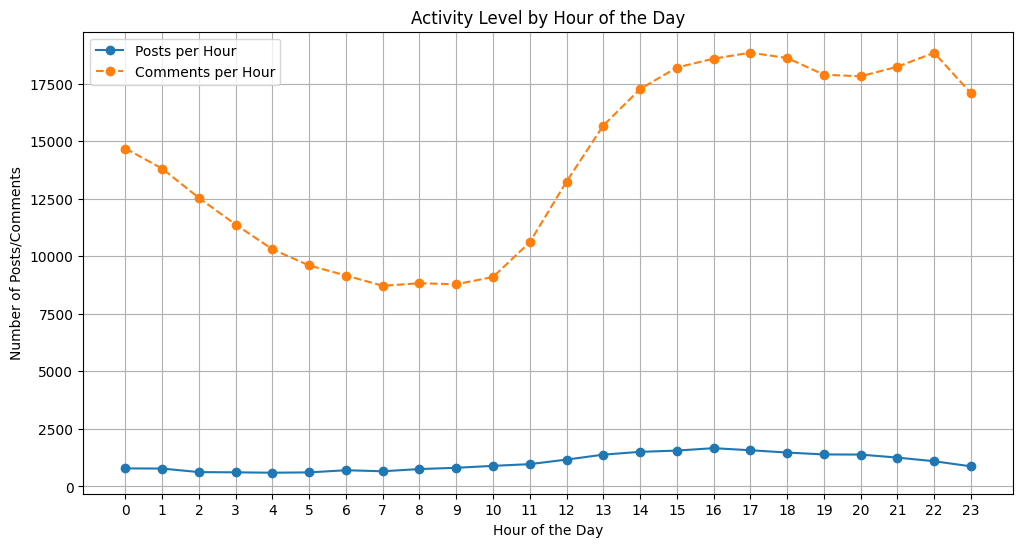

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(hourly_posts.index, hourly_posts, label='Posts per Hour', marker='o')
plt.plot(hourly_comments.index, hourly_comments, label='Comments per Hour', marker='o', linestyle='--')
plt.title('Activity Level by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts/Comments')
plt.xticks(range(0, 24))  # Ensure all hours are labeled from 0 to 23
plt.grid(True)
plt.legend()
plt.show()


In [74]:
# Find peak hours for posts and comments
peak_posts_hour = hourly_posts.idxmax()
peak_comments_hour = hourly_comments.idxmax()

print(f"Peak hour for posts: {peak_posts_hour}h")
print(f"Peak hour for comments: {peak_comments_hour}h")


Peak hour for posts: 16h
Peak hour for comments: 17.0h


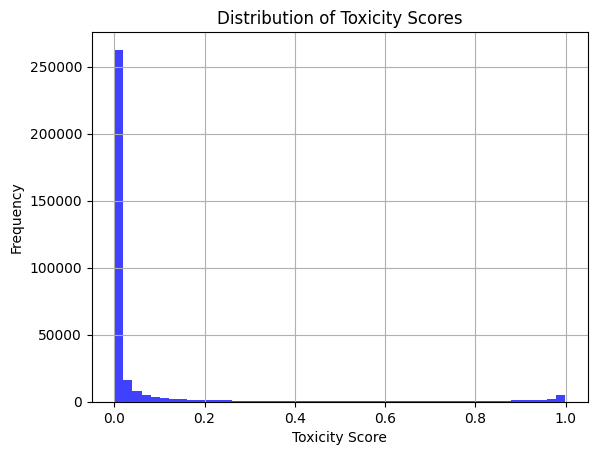

In [75]:
plt.hist(df_all_comment_with_label['score'], bins=50, alpha=0.75, color='blue')
plt.title('Distribution of Toxicity Scores')
plt.xlabel('Toxicity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [86]:
# Define thresholds
thresholds = [0.5,0.6,0.7, 0.8, 0.9]

# Calculate the percentage of comments that exceed each threshold
for threshold in thresholds:
    count_above_threshold = df_all_comment_with_label[df_all_comment_with_label['score'] > threshold].shape[0]
    total_comments = df_all_comment_with_label.shape[0]
    percentage = (count_above_threshold / total_comments) * 100
    print(f"Percentage of comments with a toxicity score above {threshold}: {percentage:.2f}%")


Percentage of comments with a toxicity score above 0.5: 6.79%
Percentage of comments with a toxicity score above 0.6: 6.01%
Percentage of comments with a toxicity score above 0.7: 5.21%
Percentage of comments with a toxicity score above 0.8: 4.32%
Percentage of comments with a toxicity score above 0.9: 3.11%


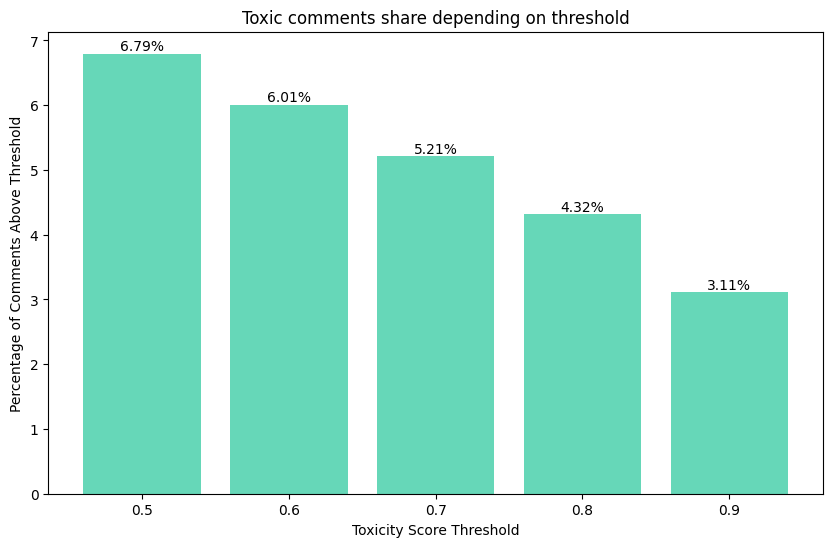

In [93]:
import matplotlib.pyplot as plt

# Store results in a list for plotting
results = []
for threshold in thresholds:
    count_above_threshold = df_all_comment_with_label[df_all_comment_with_label['score'] > threshold].shape[0]
    percentage = (count_above_threshold / total_comments) * 100
    results.append(percentage)

# Create a bar chart
plt.figure(figsize=(10, 6))

bars = plt.bar([str(t) for t in thresholds], results, color="#66D7B8")

plt.xlabel('Toxicity Score Threshold')
plt.ylabel('Percentage of Comments Above Threshold')
plt.title('Toxic comments share depending on threshold')
# Adding text labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()


In [120]:
import pandas as pd


# Define the score ranges
score_ranges = [(0.5,0.6),(0.7, 0.8),(0.9, 1.0)]

# Function to display samples for each range
def display_samples(data, ranges, num_samples=3):
    for lower, upper in ranges:
        # Filter data for the current range
        range_data = df_all_comment_with_label[(df_all_comment_with_label['score'] > lower) & (data['score'] <= upper)]
        # Sample comments
        sample_comments = range_data.sample(n=num_samples, random_state=28)
        print(f"Comments with scores between {lower} and {upper}:")
        # Print each comment neatly
        for index, row in sample_comments.iterrows():
            print(f"\nComment ID: {row['Comment ID'] }")  
            print(f"Toxicity Score: {row['score']:.2f}")
            print(f"Comment: {row['Content']}\n")
        print("-" * 50)  # Separator for readability
      

# Display samples for each defined range
display_samples(df_all_comment_with_label, score_ranges)


Comments with scores between 0.5 and 0.6:

Comment ID: kefge7j
Toxicity Score: 0.60
Comment: neoliberalism keyed my car and kicked my dog


Comment ID: f3th7i4
Toxicity Score: 0.54
Comment: you have children, if you do not take action to help them now, they and their children will likely die due to global warming think about your children and their future.


Comment ID: kh6k4sq
Toxicity Score: 0.59
Comment: merci pour cet interet et cet aiguillage ; pour l'instant, pas mal de messages envoyes sont restes sans reponse. je vais voir si parmi ces contacts que tu suggeres, j'aurais pu en oublier certains!

--------------------------------------------------
Comments with scores between 0.7 and 0.8:

Comment ID: gu8axk6
Toxicity Score: 0.77
Comment: watching woke communists talk about sowell is some of the funniest shit i'll ever see. actual psychological equivalent of clown acrobatics, absolutely legendary.


Comment ID: g5bx7bn
Toxicity Score: 0.78
Comment: we use huge energy per person. w

In [121]:
high_toxicity_comments = df_all_comment_with_label[df_all_comment_with_label['score'] > 0.7]
len(high_toxicity_comments)


17600

In [122]:
unique_users = high_toxicity_comments['Author'].nunique()
unique_users

8483

In [131]:
unique_users = high_toxicity_comments['Author'][high_toxicity_comments['Author'] != '[deleted]'].nunique()
unique_users

8482

In [149]:
high_toxicity_comments['Author'].value_counts().head(6)

Author
[deleted]             1731
Left_Insanity          148
logicalprogressive     140
LackmustestTester      101
BuffaloRepublic         96
NewyBluey               93
Name: count, dtype: int64

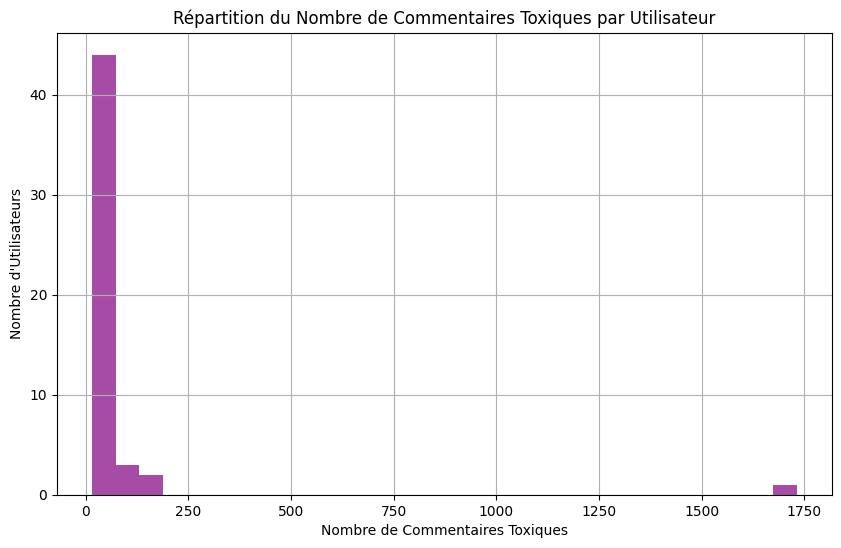

In [136]:
# Visualisation avec un histogramme si le nombre d'utilisateurs est grand
plt.figure(figsize=(10, 6))
plt.hist(high_toxicity_comments['Author'].value_counts().head(50), bins=30, color='purple', alpha=0.7)
plt.title('Répartition du Nombre de Commentaires Toxiques par Utilisateur')
plt.xlabel('Nombre de Commentaires Toxiques')
plt.ylabel('Nombre d\'Utilisateurs')
plt.grid(True)
plt.show()


In [142]:
high_toxicity_comments['Author'].value_counts().cumsum()

Author
[deleted]              1731
Left_Insanity          1879
logicalprogressive     2019
LackmustestTester      2120
BuffaloRepublic        2216
                      ...  
Iknowwecanmakeit      17596
AzamatBaganatow       17597
MobileAirport         17598
Fenecable             17599
GenericOfficeMan      17600
Name: count, Length: 8483, dtype: int64

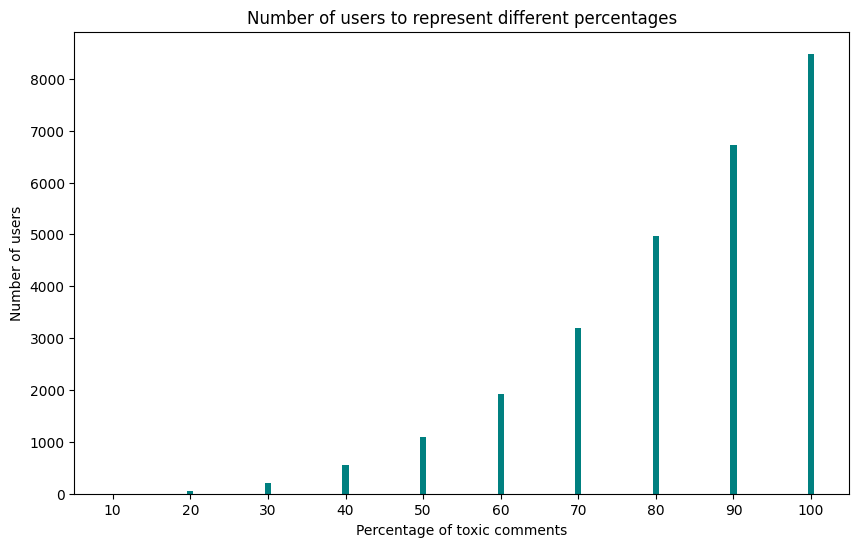

In [150]:
user_toxic_count = high_toxicity_comments['Author'].value_counts()

total_toxic_comments = user_toxic_count.sum()

cumulative_counts = user_toxic_count.cumsum()

percentages = [10, 20, 30, 40, 50,60,70,80,90,100]
users_needed = {}

for percentage in percentages:
    mark = total_toxic_comments * (percentage / 100)
    users_needed[percentage] = (cumulative_counts <= mark).sum()

percentages_list = list(users_needed.keys())
users_list = list(users_needed.values())

plt.figure(figsize=(10, 6))
plt.bar(percentages_list, users_list, color='teal')
plt.xlabel('Percentage of toxic comments')
plt.ylabel('Number of users')
plt.title('Number of users to represent different percentages')
plt.xticks(percentages_list)  
plt.show()
